# Cleaned Dataset

Importing dataset and libraries, then reducing dataset using stratified sampling based on target feature

In [1]:
import sanity_checks_methods
import ML_algorithms
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('dataset/stroke_data.csv')

no_stroke_group = df[df['stroke'] == 0]
stroke_group = df[df['stroke'] == 1]

group_size = 5000

sampled_no_stroke_group = no_stroke_group.sample(n=group_size, random_state=42)
sampled_stroke_group = stroke_group.sample(n=group_size, random_state=42)

df = pd.concat([sampled_no_stroke_group,sampled_stroke_group])
df_to_test = df.copy()

#### Dropping null values

Print null and duplicates values before removing them. After show operation results

In [2]:
sanity_checks_methods.print_null_values(df)
df = sanity_checks_methods.drop_null_values(df)
df.drop_duplicates(inplace=True)
sanity_checks_methods.print_null_values(df)

total rows: 10000
Null Value Counts:
sex                  1
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Percentage of Null Values:
sex                  0.01
age                  0.00
hypertension         0.00
heart_disease        0.00
ever_married         0.00
work_type            0.00
Residence_type       0.00
avg_glucose_level    0.00
bmi                  0.00
smoking_status       0.00
stroke               0.00
dtype: float64

Feature: sex
Null Count: 1
Null Percentage: 0.01%

Feature: age
Null Count: 0
Null Percentage: 0.00%

Feature: hypertension
Null Count: 0
Null Percentage: 0.00%

Feature: heart_disease
Null Count: 0
Null Percentage: 0.00%

Feature: ever_married
Null Count: 0
Null Percentage: 0.00%

Feature: work_type
Null Count: 0
Null Percentage: 0.00%

Feature: Residence_type
Nul

#### Dropping outliers 

no outliers detected for feature age
no outliers detected for feature avg_glucose_level

 outliers detected for frature bmi


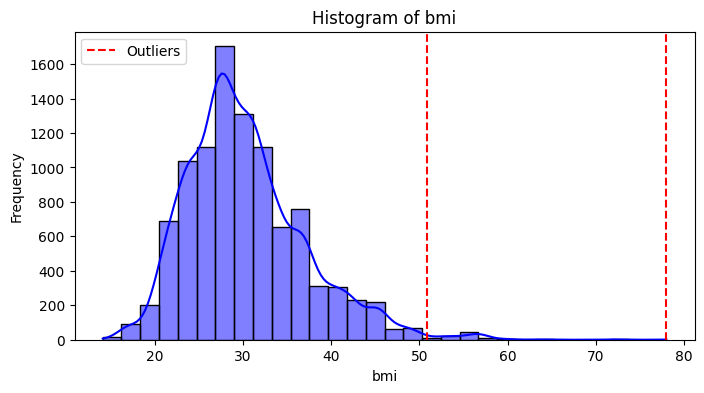

no outliers detected for feature age
no outliers detected for feature avg_glucose_level
no outliers detected for feature bmi


In [3]:
sanity_checks_methods.visualize_outliers(df)
df = sanity_checks_methods.drop_outliers(df)
sanity_checks_methods.visualize_outliers(df)

#### Dropping negative values for features BMI, age and avg_glucose_level

In [4]:
numerical_features = ['age', 'avg_glucose_level', 'bmi']

for feature in numerical_features:  
    sanity_checks_methods.check_negative_values(df, feature)
    
for feature in numerical_features:  
    df = sanity_checks_methods.drop_negative_values(df, feature)
    
for feature in numerical_features:  
    sanity_checks_methods.check_negative_values(df, feature)

abnormal values present in age feature
       sex  age  hypertension  heart_disease  ever_married  work_type  \
13764  0.0 -1.0             0              0             1          4   
10175  1.0 -2.0             1              0             1          3   
11840  0.0 -2.0             1              0             1          3   
14940  0.0 -2.0             0              0             0          4   
9808   1.0 -3.0             0              1             1          3   
9936   1.0 -1.0             1              0             1          4   
13788  0.0 -1.0             1              0             1          4   
11716  1.0 -5.0             0              0             0          4   
10549  1.0 -4.0             1              0             1          4   
12639  0.0 -2.0             0              0             1          4   
11952  1.0 -3.0             1              0             0          3   
14844  0.0 -3.0             0              1             1          2   
10826  1.0 -

dropping inconsistencies

In [5]:

df = sanity_checks_methods.drop_inconsistencies(df)

## Models


 DECISION TREE PREDICTIONS AND RESULTS
---------------------------------------------------
Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.92      0.78      0.84      1537
           1       0.80      0.93      0.86      1463

    accuracy                           0.85      3000
   macro avg       0.86      0.86      0.85      3000
weighted avg       0.86      0.85      0.85      3000

Node Labels:
 Annotation(0.645002, 0.954545, 'avg_glucose_level <= 167.36\nsamples = 6554\nvalue = [3299, 3255]\nclass = 0')


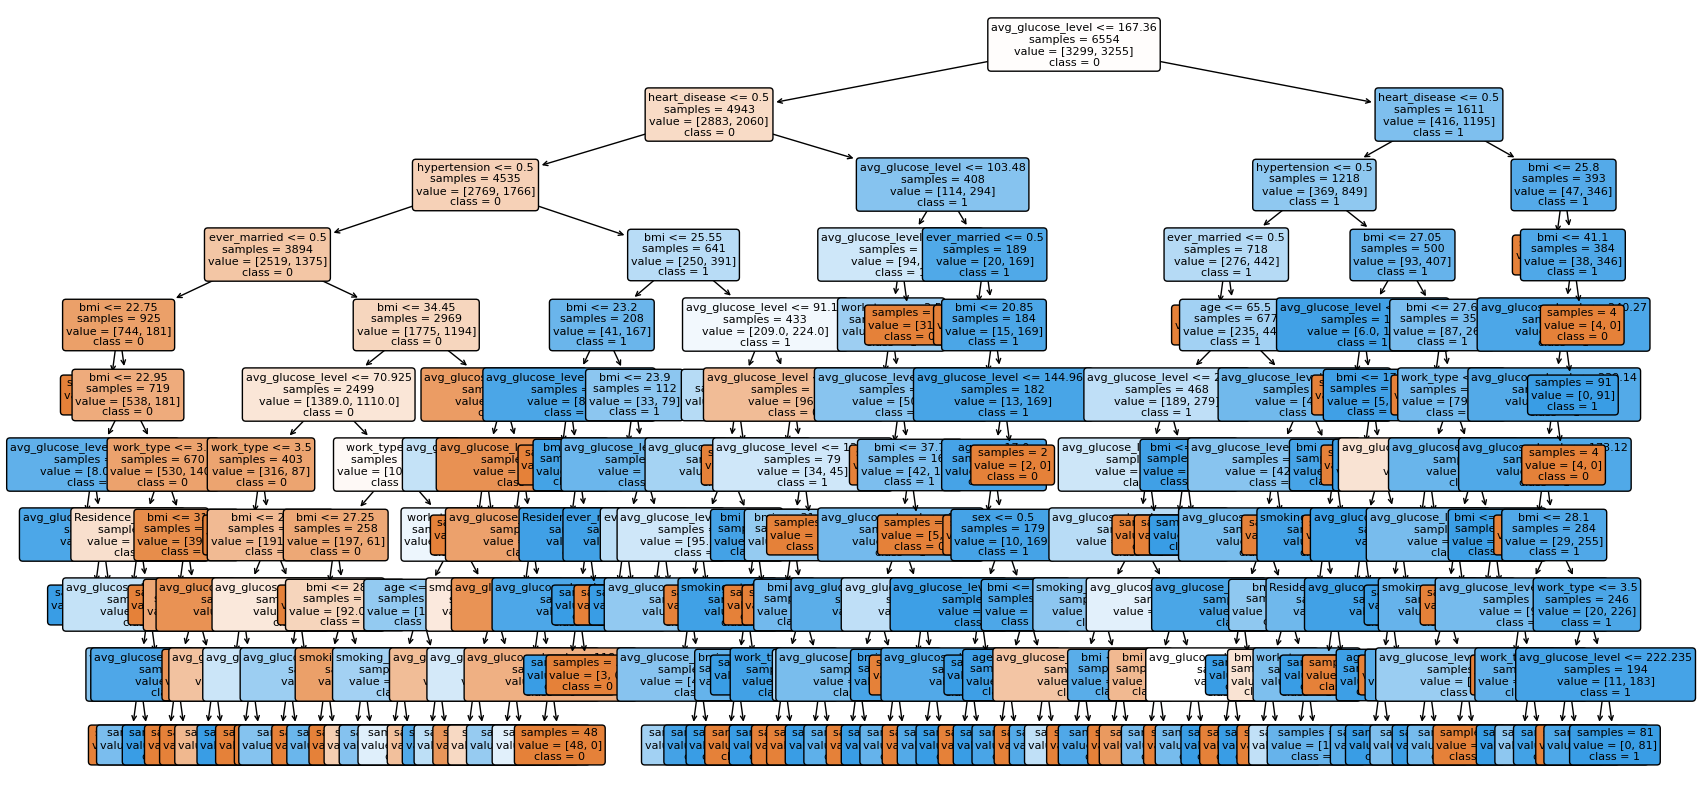

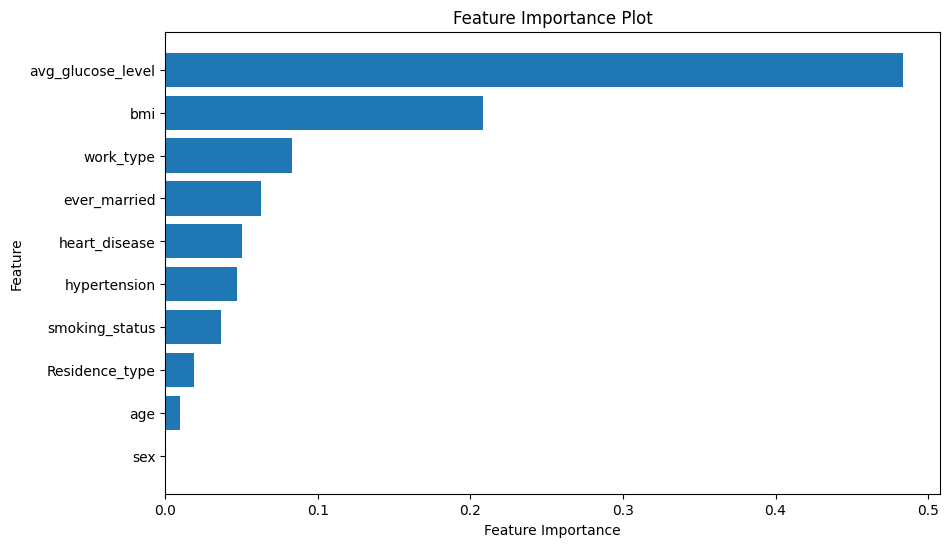

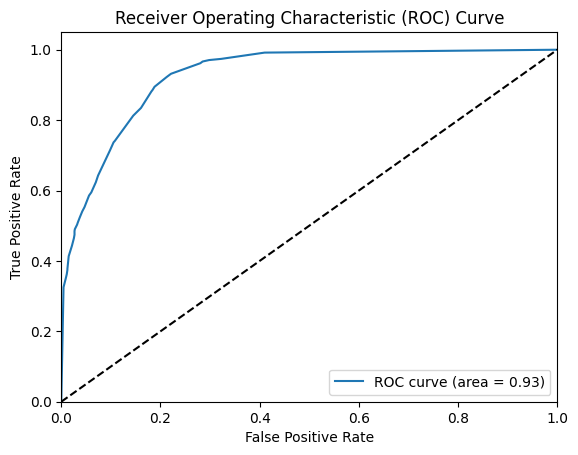

AUC Score: 0.9259916366891676


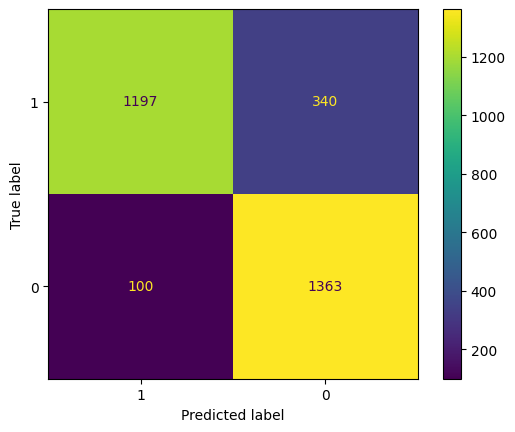

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8149466192170819, 0.8434163701067615, 0.8042704626334519, 0.8291814946619217, 0.8113879003558719, 0.8113879003558719, 0.8327402135231317, 0.797153024911032, 0.8327402135231317, 0.8285714285714286]
Mean accuracy: 0.8205795627859684
95% confidence interval: (0.8099942180014248, 0.8311649075705121)


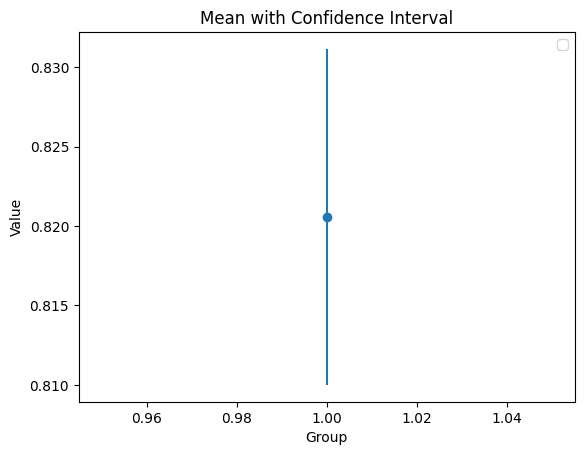


 PRINT SVM PREDICTIONS AND RESULTS
---------------------------------------------------
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'classifier__C': 100, 'classifier__gamma': 1}
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      1537
           1       0.89      0.91      0.90      1463

    accuracy                           0.90      3000
   macro avg       0.90      0.90      0.90      3000
weighted avg       0.90      0.90      0.90      3000



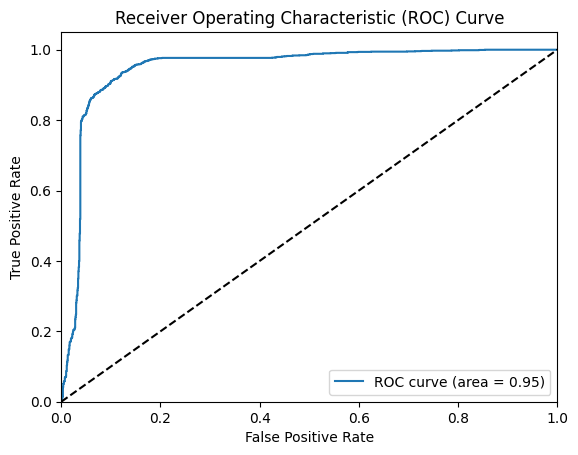

AUC Score: 0.9466711078874214


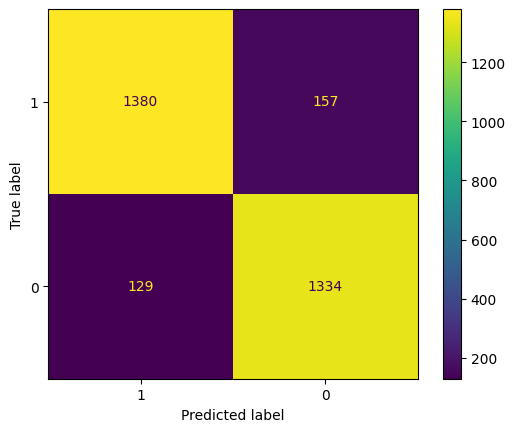

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7722419928825622, 0.7864768683274022, 0.7330960854092526, 0.7900355871886121, 0.7829181494661922, 0.8042704626334519, 0.7793594306049823, 0.7900355871886121, 0.7580071174377224, 0.8]
Mean accuracy: 0.7796441281138791
95% confidence interval: (0.76459338329577, 0.7946948729319881)


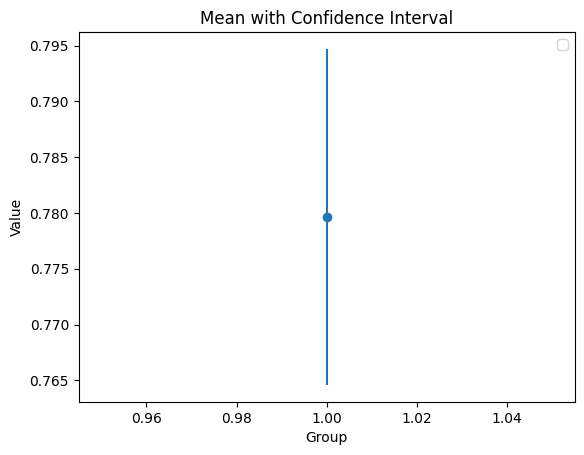

In [6]:
print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
decision_tree = ML_algorithms.model_dt(df, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(decision_tree,df)
    
print('\n PRINT SVM PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
hgb = ML_algorithms.model_svm(df, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(hgb,df) 